## Data Project Proposal
___

Over the last few decades, pharmaceutical companies have perfected sophisticated biochemical synthesis techniques to generate an uncountable number of drug candidates. Now| it is in the initial steps of drug discovery where the greatest challenges are found. Before synthesis and testing of drug candidates, the relevant disease-causing molecular targets within the body must be identified. Recently, new tools are becoming available in the form of genomic analysis that have the potential to dramatically improve progress in this area. 

Briefly, genes are encoded in the body that inform internal mechanisms of the types of proteins that must be constructed for various biological processes to function. These proteins represent the molecular targets drug researchers are seeking. Environmental or hereditary factors can causes errors in gene encoding that lead to the development of non-communicable diseases. So by identifying the protein targets and applying an appropriate drug therapy it is possible to treat the disease.

Because of these technological advancements in genomics, a multitude of publicly-available databases now exist that describe in detail the link between genes, molecular targets, and disease. Unfortunately this information is organized in non-standard formats and accessed through file downloads, web APIs, or form-based queries. It is not easy for drug researchers to utilize these resources. Furthermore, once a target is identified there is still critical research on the business-side that needs to be performed in order to ensure profitability of the fully-developed pharmaceutical.

For these reasons I propose a project that will mate business and technical risk analysis and assist pharmaceutical companies in selecting drug development strategies that maximize the return on their R&D investment. In the first phase, I plan to compile all available gene-disease data into a central repository and develop an appropriate metric to identify the strongest gene-diseases links. In the second phase, I will search public health databases to find the rates of incidence for a long list of common and rare diseases and estimate market values. In the final phase, I will combine these two analyses to develop a list of gene targets and disease areas ranked by highest likelihood of achieving financial and technical success.
___

### Plot 1. Quality of gene-disease association data
This example plot comes from a single database (DisGeNET). The weighted scores represent a metric (0,1) that describes the quality of the established link between the identified gene and associated diseases. Each gene may influence several diseases and each diseases may be influenced by several genes. In the database I intend to construct, the number of diseases linked to a particular gene will influence the gene's 'drug development score'.

There are dozens of similar independently constructed databases that need to be scraped or downloaded.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
file = 'all_gene_disease_associations.txt.gz'


# Roll through gzip csv file using pandas reader
readerc3 = pd.read_csv(file, sep='\t', compression='gzip', iterator=True, chunksize=10000)

# Concatenate to build dataframe
dfc3 = pd.concat(readerc3, ignore_index=True)

In [4]:
dfc3.head(2)

,geneId,geneSymbol,geneName,diseaseId,diseaseName,score,NumberOfPubmeds,associationType,source
0,540,ATP7B,"ATPase, Cu++ transporting, beta polypeptide",umls:C0019202,Hepatolenticular Degeneration,0.972607,200,"AlteredExpression, Biomarker, GeneticVariation","BeFree, CLINVAR, CTD_human, GAD, LHGDN, MGD, R..."
1,4160,MC4R,melanocortin 4 receptor,umls:C0028754,Obesity,0.940000,264,"Biomarker, GeneticVariation","BeFree, CLINVAR, CTD_human, GAD, MGD, RGD, UNI..."


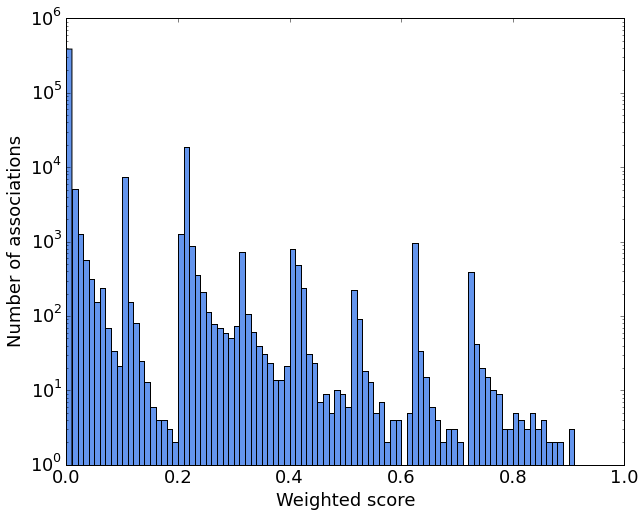

In [57]:
bins = np.arange(0,1.01,0.01)
color = 'CornflowerBlue'


plt.rc('font', size='18')
plt.ioff()

fig, ax = plt.subplots(1, figsize=(10,8))
ax.set_xlabel('Weighted score')
ax.set_ylabel('Number of associations')
ax.set_yscale("log", nonposy='clip')
_,_,_ = plt.hist(dfc3['score'], bins=bins, color=color)

plt.show()

### Plot 2. Example of health statistics
Below is a plot showing a snapshot of the time-evolution of the US population across a 50 year gap, 1960-2010. Clearly there is a huge population at 45-60 that will be reaching retirement age soon suggesting a large market developing for treatments of aging-related diseases.

The data is from The World Bank's HealthStats database.

In [3]:
health = 'HNPStats-Data.csv'

# Roll through gzip csv file using pandas reader
readerh = pd.read_csv(health, sep=',', iterator=True, chunksize=10000)

# Concatenate to build dataframe
dfh = pd.concat(readerh, ignore_index=True)

In [62]:
dfpop = dfh[(dfh['Indicator Code'].str.contains('SP.POP')) & 
            (dfh['Country Name']=='United States')]
dfnew = dfwgt[~dfwgt['Indicator Name'].str.contains('%')]
dfnew = dfnew[~dfnew['Indicator Name'].str.contains('Age')]
dffemale = dfnew[dfnew['Indicator Name'].str.contains('^Female')]
dfmale = dfnew[dfnew['Indicator Name'].str.contains('^Male')]
# (dfh['Country Name']=='United States')
# dftest = dfwgt.dropna(axis=1)
dffemale.shape, dfmale.shape

((17, 60), (17, 60))

In [63]:
dfmale.head()

,Indicator Name,Indicator Code,Country Name,Country Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
37531,Male population 00-04,SP.POP.0004.MA,United States,USA,10269373,10381644,10334693,10167349,9954960,9746111,...,10365883,10445317,10411857,10332471,10275163,10265205,10200023,10120318,10063815,NaN
37778,Male population 05-09,SP.POP.0509.MA,United States,USA,9548513,9728942,9923323,10121776,10295794,10391790,...,9964674,10050400,10176055,10295173,10355459,10372926,10409975,10452754,10489391,NaN
38025,Male population 10-14,SP.POP.1014.MA,United States,USA,8584499,8860346,9092436,9291881,9485709,9683939,...,10767625,10698204,10637741,10601535,10607821,10510529,10451400,10447733,10480250,NaN
38272,Male population 15-19,SP.POP.1519.MA,United States,USA,6745032,7096394,7481462,7881060,8259996,8584915,...,11075494,11113626,11166720,11208214,11230586,11290048,11241995,11070869,10836790,NaN
38519,Male population 20-24,SP.POP.2024.MA,United States,USA,5563854,5745697,5963238,6203822,6465209,6745846,...,10869428,10933388,10984144,11030595,11085990,11195863,11373314,11617979,11855005,NaN


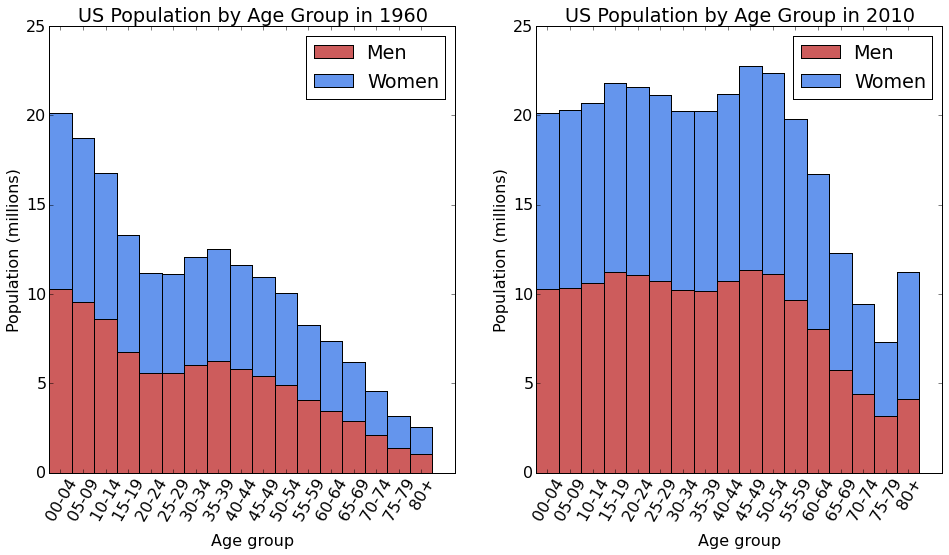

In [102]:
yrrng = range(1960,2010,5)
years = [str(yr) for yr in yrrng]

width=1
n = len(dfmale['1960'])
lbls = dfmale['Indicator Name'].str.replace('Male population','').tolist()
yrdate = ['1960','2010']
plt.ioff()

plt.rc('font', size='16')

fig, axes = plt.subplots(1,2,figsize=(16,8))
for ax,yr in zip(axes,yrdate):
    ax.bar(range(n), dfmale[yr]/1e6, width, color='IndianRed')
    ax.bar(range(n), dffemale[yr]/1e6, width, color='CornflowerBlue', bottom=dfmale[yr]/1e6)
    ax.set_xlabel('Age group')
    ax.set_xticks(np.arange(n) + width/2.)
    ax.set_xticklabels(lbls, rotation=60)
    # # plt.yticks(np.arange(0, 81, 10))
    ax.legend((p1[0], p2[0]), ('Men', 'Women'))
    ax.set_ylabel('Population (millions)')
    ax.set_title('US Population by Age Group in '+yr)
    
plt.show()